<a href="https://colab.research.google.com/github/anabomfim84/CienciaDeDados/blob/main/MVPMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Machine Learning**
**Aluna: Ana Cristina Paula Bomfim**

**MVP Detecção de Doenças Cardiovasculares**



# **Definição do Problema**
As doenças cardiovasculares (DCV) são a causa número 1 de morte em todo o mundo. Quatro em cada cinco mortes por DCV são devidas a ataques cardíacos e acidentes vasculares cerebrais, e um terço destas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade.

De acordo com a OMS, as doenças do coração incluem:

* Doença coronariana
* Doença cerebrovasculas
* Doença arterial periférica
* Doença cardíaca reumática
* Cardiopatia congênita
* Entre outras

Atualmente a implementação de técnicas computacionais na área da saúde tem se tornado cada vez intensa, com destaque para algoritmos de aprendizado de máquina e redes neurais artificiais. Utilizando modelos matemáticos, é possível afirmar ou negar, a partir de conjunto de dados clínicos, o grau de influência de determinados sintomas no desenvolvimento ou aparecimento de doenças.

O objetivo deste trabalho é desenvolver um modelo de machine learning utilizando técnicas de classificação para prever quais pacientes possuem doenças cardiovasculares.

# **Dataset**

Os dados foram coletados através do portal https://www.kaggle.com/ e o arquivo utilizado foi o heart.csv.

Segundo informações no portal, o dataset é uma combinação de datasets disponíveis em diversas plataformas, mas nunca combinados anteriormente. Inicialmente haviam 1190 observações, mas foram realizadas tratativas para remoção de duplicatas, resultando em 918 observações.

O dataset possui informações clínicas de pacientes que tiveram ou não doenças cardíacas. Ele é do tipo supervisionado, com uma classe preditora e 11 atributos previsores.



## **Atributos**


**Nome:**	Descrição

**Age:**	Idade do Paciente

**Sex:**	Sexo do paciente

**ChestPainType:**	Tipo de dor no peito

**RestingBP:**	Pressão sanguínea em repouso

**Cholesterol:**	Medida de colesterol

**FastingBS:** Pressão sanguínea em jejum

**RestingECG:**	Resultado de eletrocardiograma em repouso

**MaxHR:**	Taxa máxima de batimento cardíaco

**ExerciseAngina:**	Dor no coração ao exercitar

**Oldpeak:**	Depressão ST induzida pelo exercício

**ST_Slope:**	O declive do pico de depressão ST induzida pelo exercício

**HeartDisease:**	Classe preditora

## **Importação das Bibliotecas**

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm # biblioteca de modelagem estatística




## **Carga e Análise do Dataset**

In [3]:
# Informa a URL de importação do dataset
dataset = pd.read_csv ("https://raw.githubusercontent.com/anabomfim84/MVPMachineLearning/refs/heads/main/heart.csv")

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Informações sobre o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


O dataset possui 918 **instâncias** (linhas) e 12 **atributos** (colunas).

Não possui valores nulos.

Cinco atributos do tipo **Object** (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope) que serão analisados.

In [5]:
dataset['Sex'].value_counts()

,count
Sex,
M,725
F,193


In [6]:
dataset['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [7]:
dataset['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [8]:
dataset['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [9]:
dataset['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


In [10]:
# Verifica a classe preditora
dataset.groupby('HeartDisease').size()


,0
HeartDisease,
0,410
1,508


Atributo com resultado balanceado entre pacientes com ou sem doenças cardíacas.

# **Pré Processamento de Dados**

### **Tratamento Dados Categóricos**

Abaixo faremos a conversão dos atributos categóricos, para atributos numéricos.

In [11]:
sex_map = {'M': 0, 'F': 1}
slope_map = {'Flat': 0,'Up': 1 ,'Down': 2}
angina_map = {'N': 0,'Y':1}
resting_map = {'Normal':0 ,'LVH':1 ,'ST':2}
chestpain_map = {'ASY':0,'NAP':1,'ATA': 2,'TA':3}

dataset['Sex']=dataset['Sex'].map(sex_map)
dataset['ST_Slope']=dataset['ST_Slope'].map(slope_map)
dataset['ExerciseAngina']=dataset['ExerciseAngina'].map(angina_map)
dataset['RestingECG']=dataset['RestingECG'].map(resting_map)
dataset['ChestPainType']=dataset['ChestPainType'].map(chestpain_map)

In [12]:
# Informações sobre o dataset após transformação
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


## **Feature Selection com SelectKBest**

Nessa etapa iremos realizar o processo de seleção de atributos, conhecido como Feature Selection, com o objetivo de reduzir a dimensionalidade do conjunto de dados. Essa redução facilita a execução do modelo e ajuda a evitar problemas de overfitting.

In [14]:

Xvar = dataset.drop('HeartDisease', axis=1)  # Todas as colunas, exceto a preditora.
yvar = dataset['HeartDisease'] # Apenas a Preditora

# Temos 12 atributos, iremos selecionar 6 atributos com SelectBest
best_var = SelectKBest(score_func=f_classif, k=6)

# Executa a função e obtem os atributos selecionados
fit = best_var.fit(Xvar, yvar)

# Reduz X para os atributos selecionados
features = fit.transform(Xvar)

# Resultados
print('\nNúmero original de atributos:', Xvar.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", *dataset.columns[0:11], sep='\n')

# Exibe as pontuações de cada atributos e os 6 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:11]))





Número original de atributos: 11

Número reduzido de atributos: 6

Atributos Originais:
Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope

Scores dos Atributos Originais: [ 79.161  94.253 261.643  10.727  52.46   70.479  10.735 174.914 296.145
 178.615 172.204]

Atributos Selecionados: ['Sex' 'ChestPainType' 'MaxHR' 'ExerciseAngina' 'Oldpeak' 'ST_Slope']


In [15]:
# Iremos construir um novo Dataset com os 6 atributos selecionados e a classe preditora
new_dataset = dataset.copy()
new_dataset = new_dataset[['Sex','ChestPainType','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]
new_dataset.head()

,Sex,ChestPainType,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,2,172,0,0.0,1,0
1,1,1,156,0,1.0,0,1
2,0,2,98,0,0.0,1,0
3,1,0,108,1,1.5,0,1
4,0,1,122,0,0.0,1,0


## **Separação em Conjunto de Treino e Conjunto de Teste com Holdout**

In [16]:
test_size = 0.30 # Tamanho do conjunto de teste (30%)
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste (holdout)
array = new_dataset.values
X = array[:,0:6] #Varáveis de entrada
y = array[:,6] #Variável de saída

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 5
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


# **Modelagem e Inferência**





Nessa etapa o objetivo é testar diversos algorítmos de machine learning para verificar qual deles tem o melhor desempenho para o conjunto de dados de treino.
 Assim, usaremos a validação cruzada para treinar e avaliar os modelos usando a métrica acurácia.

In [17]:
# Definindo uma semente global
np.random.seed(seed)

# Lista que armazenará os modelos
models = []

# Criando os modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

##**Criação e Avaliação de Modelos: Linha Base**

LR = Média: 0.8379239341085271 | Desvio Padrão: 0.02385182217965823
KNN = Média: 0.7974079457364341 | Desvio Padrão: 0.03177924809951137
CART = Média: 0.8006661821705426 | Desvio Padrão: 0.05082650111865942
NB = Média: 0.8504360465116279 | Desvio Padrão: 0.018278439004965272
SVM = Média: 0.6758115310077519 | Desvio Padrão: 0.05474347947652856


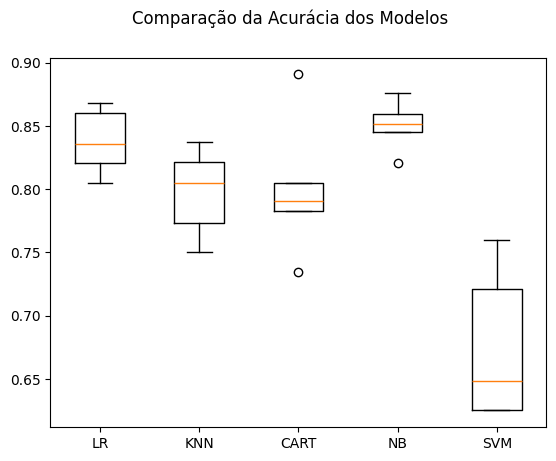

In [18]:
# Lista para armazenas os resultados dos modelos
results = []

# Lista para armazenar os nomes dos modelos percorridos no treinamento
names = []

# Definição da métrica de acurácia
scoring='accuracy'

# Percorre os modelos e treina utilizando validação cruzada, cujo resultado será a métrica de acurácia.
for name, model in models:
  new_dataset = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(new_dataset)
  names.append(name)
  # Imprime na tela a média e desvio padrão do resultado de cada modelo
  print(f'{name} = Média: {new_dataset.mean()} | Desvio Padrão: {new_dataset.std()}')

# Boxplot para comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Imprime o boxplot na tela
plt.show()


**Resultados da Validação Cruzada**

Regressão Logística (LR): Média de 83,79%, Desvio Padrão de 2,38%

KNN: Média de 79,74%, Desvio Padrão de 3,17%

Árvore de Decisão (CART): Média de 80,06%, Desvio Padrão de 5,08%

Naive Bayes (NB): Média de 85,04%, Desvio Padrão de 1,82%

SVM: Média de 67,58%, Desvio Padrão de 5,4%

**Interpretação dos Resultados:**

Melhor desempenho: O NB obteve a maior média de acurácia, com 85,4%, além de um desvio padrão bem baixo (1,8%), indicando que ele tem um bom desempenho e é consistente.

Desvio Padrão: O NB se destaca por ter o menor desvio padrão, o que é uma boa indicação de que o modelo está bem ajustado e não sofre tanto com variações nos dados.

Dado este percentual, podemos dizer que não houve o underfitting.

## **Ensembles**

Os métodos ensemble (ou comitês) combinam vários modelos de machine learning, o que pode fazer com que os resultados sejam melhores do que quando usamos apenas um modelo.
Iremos realizar o treinamento utilizando o método Voting com os algorítimos de Regressão Logística, Árvore de Decisão e SVM.

In [19]:
# Criação da lista para armazenar as bases para o VotingClassifier
models_voting = []

# Definição dos modelos
model_LR = LogisticRegression(max_iter=200)
model_CART = DecisionTreeClassifier()
model_SVM = SVC()

models_voting.append(('LR',model_LR))
models_voting.append(('CART',model_CART))
models_voting.append(('SVM',model_SVM))

# Adicionando as bases de voting à lista de modelos

models.append(('Voting', VotingClassifier(models_voting)))

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.837924 (0.023852)
KNN: 0.797408 (0.031779)
CART: 0.799092 (0.050124)
NB: 0.850436 (0.018278)
SVM: 0.675812 (0.054743)
Voting: 0.831674 (0.040056)


Com base nos resultados de desempenho dos algorítmos, podemos justificar a escolha da seguinte forma:

Observando a saída acima, percebemos que o resultado do método NB (85,04%) é próximo ao método Voting (83,16%).

Os algorítimos SVM e Voting são candidatos ao modelo com melhor acurácia.


## **Criação e Avaliação de Modelos: Dados Padronizados e Normalizados**

Em seguida, vamos repetir esse processo, utilizando a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original.

LR-orig: 0.838 (0.024)
KNN-orig: 0.797 (0.032)
CART-orig: 0.801 (0.051)
NB-orig: 0.850 (0.018)
SVM-orig: 0.676 (0.055)
Vot-orig: 0.841 (0.034)
LR-padr: 0.839 (0.023)
KNN-padr: 0.833 (0.026)
CART-padr: 0.805 (0.049)
NB-padr: 0.850 (0.018)
SVM-padr: 0.850 (0.015)
Vot-padr: 0.850 (0.016)
LR-norm: 0.838 (0.030)
KNN-norm: 0.826 (0.029)
CART-norm: 0.807 (0.040)
NB-norm: 0.850 (0.018)
SVM-norm: 0.852 (0.021)
Vot-norm: 0.855 (0.017)


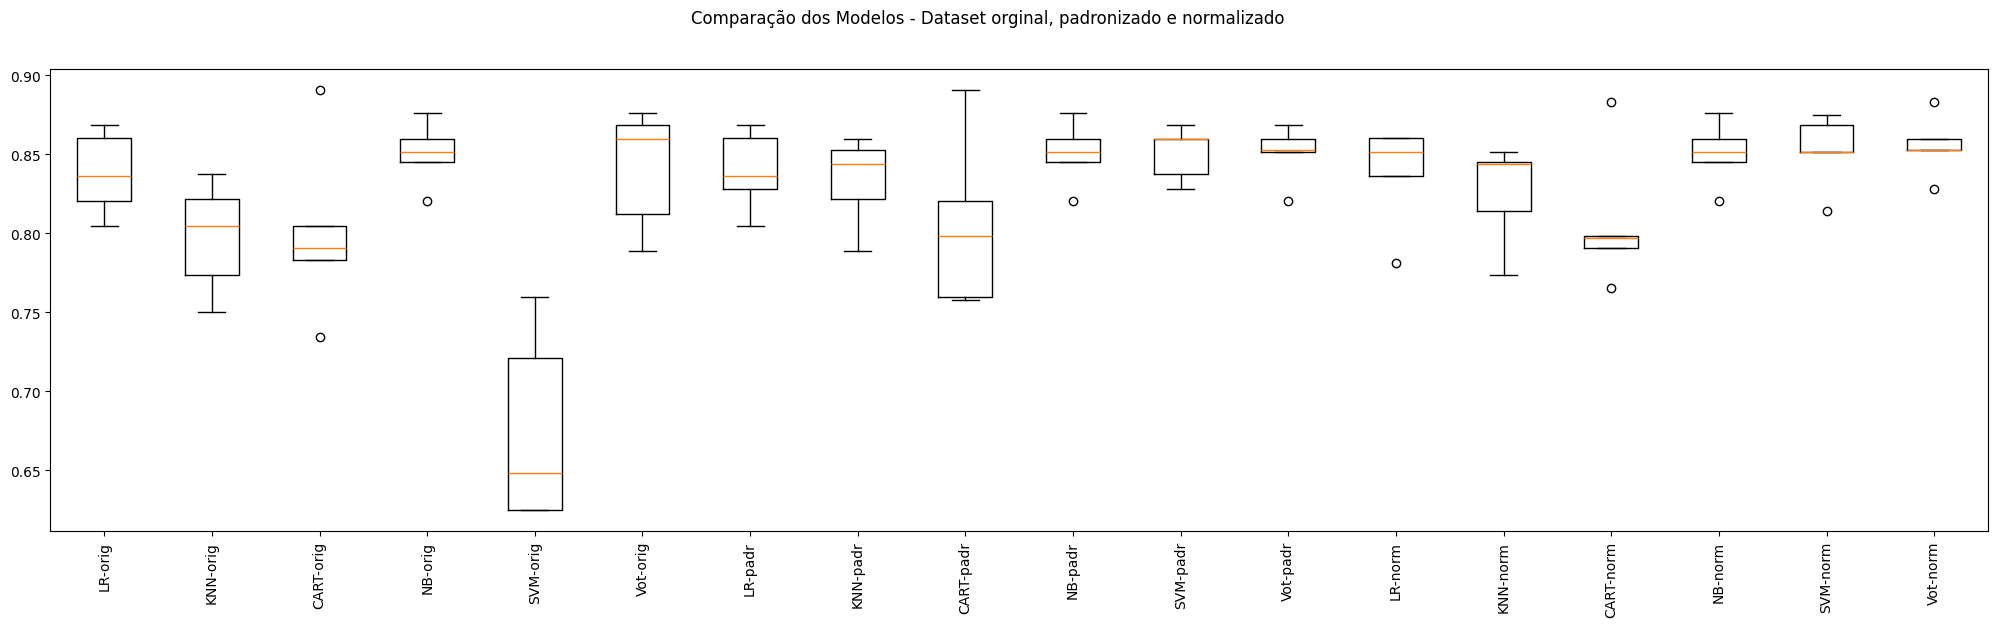

In [20]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
voting = ('Voting', VotingClassifier(estimators=models_voting))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    new_dataset = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(new_dataset)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, new_dataset.mean(), new_dataset.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()



Com base nos resultados de desempenho dos algoritmos de machine learning fornecidos, podemos observar que vários algoritmos têm um desempenho semelhante, com acurácias próximas e desvios padrão relativamente baixos. Os algoritmos Naive Bayes (NB), Support Vector Machine (SVM), e Voting (Vot) são consistentemente competitivos nas duas versões dos dados (padr, norm), com acurácias em torno de 0.85.

Com base exclusivamente nos resultados apresentados, os algoritmos Naive Bayes (NB), Support Vector Machine (SVM) e Voting (Vot) parecem ser as opções mais indicadas, pois apresentam desempenho consistente e acurácias ligeiramente mais altas em comparação com os demais algoritmos.

## **Otimização dos Hiperparâmetros**

Vamos agora utilizar a função RandomizedSearchCV para otimizar os hiperparâmetros do algoritmo Naive Bayes (NB), visando obter resultados ainda melhores.

In [21]:
# Tuning do NB
np.random.seed(seed)  # Definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
nb = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('NB-orig', Pipeline(steps=[nb])))
pipelines.append(('NB-padr', Pipeline(steps=[standard_scaler, nb])))
pipelines.append(('NB-norm', Pipeline(steps=[min_max_scaler, nb])))

param_grid = {
    'NB__var_smoothing': np.logspace(-9, 0, num=10)  # Exemplo de hiperparâmetro a ser otimizado
}

# Prepara e executa o RandomizedSearchCV
for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=scoring, cv=kfold)
    random_search.fit(X_train, y_train)
    # Imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, random_search.best_score_, random_search.best_params_))


Sem tratamento de missings: NB-orig - Melhor: 0.850436 usando {'NB__var_smoothing': 1e-09}
Sem tratamento de missings: NB-padr - Melhor: 0.853561 usando {'NB__var_smoothing': 0.1}
Sem tratamento de missings: NB-norm - Melhor: 0.851999 usando {'NB__var_smoothing': 0.001}


# **Finalização do Modelo**


Podemos agora finalizar o modelo escolhido. Os modelos que alcançaram melhores resultados e foram os escolhidos:



*   Naive Bayes (NB) com os dados pradronizados (85,35%)
*   Voting Normalizados (85,5%)


A seguir, finalizaremos esse modelo, treinando-o em todo o conjunto de dados de treinamento.

In [32]:
# Definindo o modelo de Voting Classifier

model_voting = VotingClassifier(models_voting)

# Treina com todo o conjunto de dados de treino
model_voting.fit(X_train,y_train)

# Realiza a predição com o conjunto de dados de teste
predictions_voting = model_voting.predict(X_test)

# Estima a acurácia no conjunto de teste e imprime o resultado
print(accuracy_score(y_test, predictions_voting))



0.8405797101449275


Score de 84,05%. Acurácia um pouco abaixo que o conjunto de treino.

In [33]:
# Definindo o modelo Naive Bayes
model_nb = GaussianNB()

# Treina com todo o conjunto de dados de treino
model_nb.fit(X_train, y_train)

# Realiza a predição com o conjunto de dados de teste
predictions_nb = model_nb.predict(X_test)

# Estima a acurácia no conjunto de teste e imprime o resultado
print(accuracy_score(y_test, predictions_nb))

0.822463768115942



Score de 82,24%. Acurácia um pouco abaixo que o conjunto de treino.

## **Comparação dos Modelos Candidatos**
A partir dos resultados é possivel estimar que todos os modelos tem uma boa capacidade de generalização, pois apresentaram bons percentuais com com o conjunto de teste. Logo, não houve o Overfitting.

##**Conclusão Final**

Foi possível realizar a análise de diversos métodos de aprendizado de máquina, com o objetivo de identificar o estimador mais apropriado em diferentes cenários (original, padrão, normalizado). Foi possível determinar os parâmetros ajustáveis ​​mais eficientes para prever o valor desejado, alcançando a maior acurácia e precisão possível. Com base nesses resultados, podemos concluir que encontramos o modelo mais eficaz para lidar com o problema apresentado.

Modelo Escolhido : **Voting**

Embora o novo modelo não tenha superado a acurácia do modelo anteriorior, a diferença entre os dois resultados é relativamente pequena.

Voting (Treino X Teste)
85,5% contra 84,05% respectivamente.